<a href="https://www.kaggle.com/code/viniciusnalasantos/housepricesalgoritm?scriptVersionId=120330280" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Linear Regression: Advanced Modeling Techniques & Pipeline [Pt.1]

![head.png](https://miro.medium.com/v2/resize:fit:828/format:webp/1*SKMv5WG1awobyKkTacXJdQ.png)

Linear Regression occupies a good part of Data Science area, learn how to build models based on linear regression techniques today - is essential. Although Linear Regressions Models are relatively simple, they can be used to solve many problems with great accuracy.

Not only it's used in Data Science but also is used in many fields, from business and financial sectors to biology and science. In conclusion, it can be used for a myriad of things.
 
In this series of articles, I will elucidate the concept of linear regression through the [Kaggle Competition: "House Prices - Advanced Regression Techniques"](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques), starting first with the basic linear regression equation, and going to complex analysis, showing in the second part of this article, the most common regressors models. Also, in the meanwhile, I will explain ways to deal with categorical variables and teach how to use a pipeline to preprocess them.

### Table of Contents

[Part One](#part_one)
* [Classification Models x Regression Models](#classification_regression)
* [Linear Regression Equation](#equation)
* [General Characteristics of the Dataset](#general)
* [Target Variable Behavior](#target_variable_behavior)
* [Missing Values Overview](#missing_values_overview)
* [Divide Qualitative and Quantitative Variables](#divide_qualitative_quantitative)
    - [Quantitative Analysis](#quantitative)
    - [Qualitative Analysis](#qualitative)
        - [Ordinal Encoding](#ordinal_encoding)
        - [One Hot Encoding](#one_hot_encoding)
* [Prepare the Dataset](#prepare_dataset)
    - [Transformation](#transformation)
* [Conclusion](#conclusion)

[Part Two](#part_two) (the article is coming soon...)
* [Missing Values Treatment](#missing_values)
* [Preprocessing with ColumnsTransformer](#preprocessing)
* [Pipeline with a Simple Linear Regression Model](#pipeline_lr)
* [Linear Regression](#linear_regression)
    - [Linear Equation](#linear_equation)
    - [Regression Equation](#regression_equation)
    - [Ordinary Least Squares (OLS)](#ols)
* [Linear Regression and Machine Learning](#lr_ml)
* [Analysis of the fitting of the model to the data](#analysis)
    - [R-squared](#r_squared)
    - [Coef](#coef)
    - [P>|t|](#p_test)
* [Random Forest Regressor](#rfr)
* [Extreme Gradient Boosting Regressor](#xgbr)
* [Conclusion](#conclusion_2)

<a id="part_one"></a>
<h2><b> Part One </b></h2>

---

#### Code from the article: [Linear Regression: Advanced Modeling Techniques & Pipeline [Pt.1]](https://medium.com/@viniciusnala/linear-regression-advanced-modeling-techniques-pipeline-pt-1-3c0433230b88)

<a id="classification_regression"></a>
## Classification Models x Regression Models

First of all, I would like to distinguish Classification Models from Regression Models, which have a key difference: the first one is used to predict discrete values, while the other predicts quantities.

For instance, in my [last article](https://medium.com/@viniciusnala/machine-learning-model-to-predict-survival-in-titanic-pt-1-b3681d1794fb), I built a classification model to predict if a person would survive or not on Titanic. In this case, we try to predict two values: 0 and 1 (Survived or Not Survived), so it's a classification algorithm. In this article, I will build a model that predicts the sale price of a house according to the data provided by Kaggle. So it's a regression algorithm, which predicts a quantity - in this case, the sale price of a house but could be the salary, age, etc.

<a id="equation"></a>
## Linear Regression Equation

The Linear Regression Equation describes the linear relationship between the independent variables and dependent variables. Below you can see the equation:

![image.png](https://miro.medium.com/v2/resize:fit:828/format:webp/1*k2bLmeYIG7z7dCyxADedhQ.png)

Least squares regression produces a linear regression equation, this procedure is a bit complex and there are a lot of videos and articles explaining the process of calculating it. Today, we can simply use software to fit the data to this equation, however, you wouldn't be a good analyst if you only do this without knowing what is happening behind the scenes.

For this series of articles, I will show the general process when we arrive at the part of building the model.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Hide Warnings
import warnings
warnings.filterwarnings('ignore')

<a id="general"></a>
## General Characteristics of the Dataset

Let's do this way: start coding and during the analysis - when appears convenient - we stop to explain the concepts that are necessary to comprehend what we are doing.

First, collect the data. The training data will be used to make our analysis and train the models; the test data will just be used in the end, to predict the target variable and submit it to Kaggle.

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

Now, let's catch a glimpse of the dataset:

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

Looking at the image above we can see that there are some missing values, 1460 lines, and 81 columns, which is a lot of columns. Excluding the Id column and the target variable which is the "SalePrice" column, we conclude that we can use at least 79 columns to predict the target variable. Along the article, we will learn how to identify the relevant variables, so there are columns that will be useless.

<a id="target_variable_behavior"></a>
## Target Variable Behavior

In [6]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Above we can see some central tendency measures, now let's see the distribution of the target variable.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

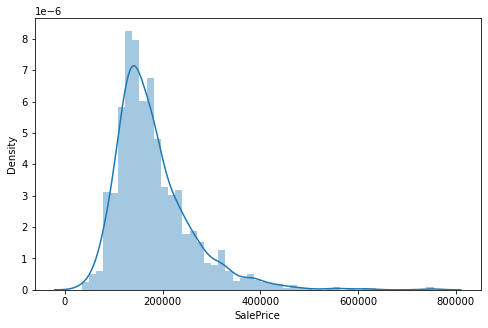

In [7]:
# Histogram
plt.figure(figsize=(8,5))
sns.distplot(train['SalePrice'])

Very interesting, the "SalePrice" variable has a right-skewed distribution. A good way to deal with it is by applying a method to transform it into a normal distribution before starting modeling. There are many methods, and the best one is the one that better transforms into a normal distribution.

![distributions.png](https://miro.medium.com/v2/resize:fit:828/format:webp/1*pTFKKfg-Cy1xyBv4oBoWsg.png)

In real life, the major part of the data that you are going to deal with comes with an asymmetric distribution, so learn how to convert it to a normal distribution is an important skill.

Why transform a skewed variable into a more normalized variable? When modeling variables with non-linear relationships or a not-so-linear relationship, the transformation can make these relationships more linear, improving the fit of the model to the data. Furthermore, the shape of the distribution plays a role in determining the appropriate method of statistical analysis; if we're performing a statistical analysis that assumes normality, a transformation might help us meet this assumption.

In [8]:
# Measure the level of asymmetry in SalePrice Data
print("Skew: ", train['SalePrice'].skew())

# Measures the peakness of a frequency distribution
print("Kurtosis: ", train['SalePrice'].kurtosis())

Skew:  1.8828757597682129
Kurtosis:  6.536281860064529


Measures like skewness and kurtosis are used to describe the spread and height of the distribution. The first one measures the lack of symmetry and the other the flatness of the curve.

<AxesSubplot:xlabel='SalePrice'>

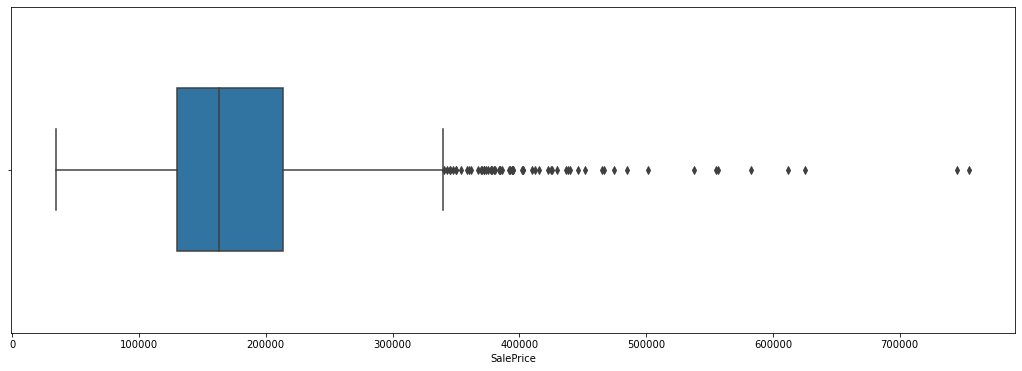

In [9]:
# right skewed distribution
plt.figure(figsize=(18, 6))
sns.boxplot(train['SalePrice'], orient='h', width=0.5)

Another way of looking at the distribution of the data is using the boxplot graph, where we can clearly see that there are many outliers on the right side of the plot.

<a id="missing_values_overview"></a>
## Missing Values Overview

In [10]:
(train.isnull().sum() / train.shape[0] * 100).sort_values(ascending=False)[:20]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

After seeing the overview of the dataset and the target variable behavior, it's good to get a notion of how many missing values the dataset has.

Sometimes these values are missing not because they weren't collected, but because they mean that the thing doesn't exist. For example, [reading the data description of the dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data), we can see that the variable "Alley" has "Nan" values because some houses don't have alley access. The columns "BsmtQual" and "BsmtCond" happens the same: have missing values not because they are missing, and the fact that these two variables have the same percentage of missing values reinforces the idea that there are some houses without a basement.

![alley.png](https://miro.medium.com/v2/resize:fit:720/format:webp/1*xcSwIdFgl2YIhXBu8UbrvQ.png)

This is why is important to understand the dataset before making a hasty decision of just deleting the null variables or filling it with a random variable.

Therefore, after analyzing the dataset, I concluded that the variables that have more than 80% of missing values will be excluded because they aren't relevant for predicting the target variable.

In [11]:
# Drop columns with too much missing values
# categorical_cols = [col for col in categorical_cols if col not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence']]
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

<a id="divide_qualitative_quantitative"></a>
## Divide Qualitative and Quantitative Variables

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

An efficient approach to analyze the variables is by dividing the dataset into categorical variables and numerical variables.

In [13]:
categorical_cols = [col for col in train.columns if train[col].dtype == 'object']
numerical_cols = [col for col in train.columns if train[col].dtype in ('int64', 'float64')]

This way is necessary because the approach used to analyze if a variable is relevant to solving the problem can differ from a categorical variable to a numerical variable.

I decided to first analyze the quantitative variables.

<a id="quantitative"></a>
## Quantitative Analysis

Once we are exploring the data for a linear regression model, we should start looking at the correlation between the variables.

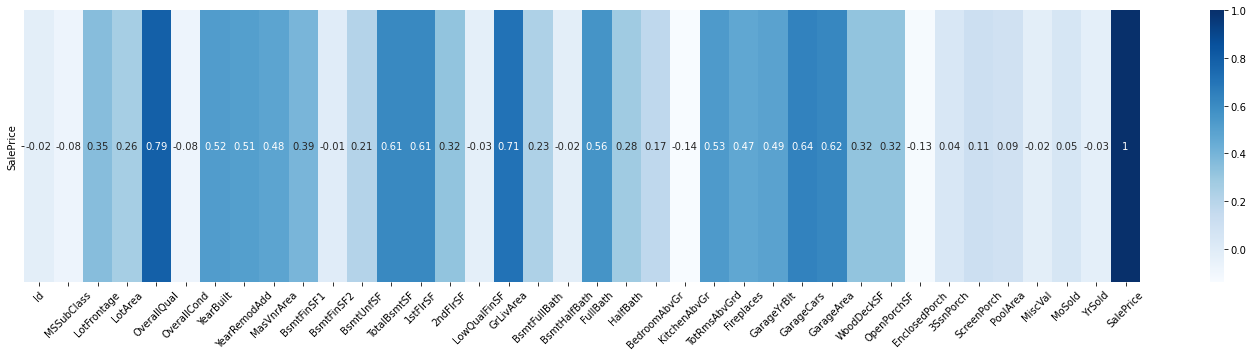

In [14]:
# Data
correlation = train[numerical_cols].corr().round(2)[-1:-2:-1]

# Plot
plt.figure(figsize=(25,5))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.xticks(rotation=45)
plt.show()

In the image above, we can see the correlation between the dependent variable and the independent variables. Let's see through a scatterplot if we can see a linear relationship between "SalePrice" and the variables that have a high correlation with it.

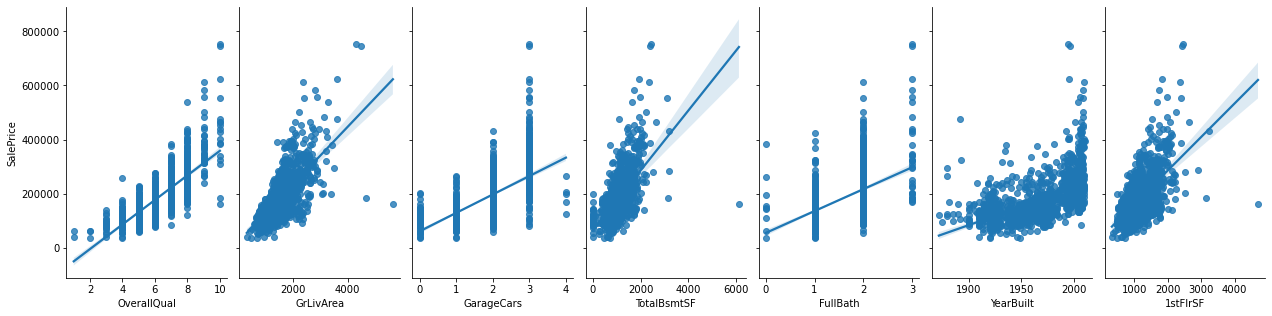

In [15]:
ax = sns.pairplot(train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF']], 
             y_vars=['SalePrice'],
             x_vars=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF'],
             height=2.5,
             kind='reg') # 'scatter'
ax.figure.set_size_inches(18, 5)

It's very visible that there are linear relationships. Nevertheless, we can see that there are some subtle outliers that might reduce the effectiveness of the model, so it's better to just remove them.

In [16]:
# Filter out some OutLiers
train = train[train['GrLivArea']<4000]
train = train[train['TotalBsmtSF']<6000]
train = train[train['1stFlrSF']<4000]

Well, now let's just save the name of the columns that we found relevant.

In [17]:
# Relevant Columns
num_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF']

<a id="qualitative"></a>
## Qualitative Analysis

To do this analysis, I will use a different approach - once dealing with string values are more complicated than numerical values.

First, I would like to introduce two common ways of dealing with categorical values.

<a id="ordinal_encoding"></a>
### Ordinal Encoding

Ordinal encoding assigns each unique value to a different integer.

![18.png](https://miro.medium.com/v2/resize:fit:828/format:webp/1*c40wiKwDlLFeJT3hX8v8BQ.png)

This approach assumes an ordering of the categories: "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).
 
This assumption makes sense in this example, because there is an indisputable ranking to the categories. Not all categorical variables have a clear ordering in the values, but we refer to those that do as ordinal variables. For tree-based models (like decision trees and random forests), you can expect ordinal encoding to work well with ordinal variables.

<a id="one_hot_encoding"></a>
### One Hot Encoding

One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. To understand this, we'll work through an example.

![19.png](https://miro.medium.com/v2/resize:fit:828/format:webp/1*cnmpSdK-6hAQJdTUBFxcnA.png)

In contrast to ordinal encoding, one-hot encoding does not assume an ordering of the categories. Thus, you can expect this approach to work particularly well if there is no clear ordering in the categorical data (e.g., "Red" is neither more nor less than "Yellow"). We refer to categorical variables without an intrinsic ranking as nominal variables.

One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (you generally won't use it for variables taking more than 15 different values).

When these two approaches appear clear to you, it will be easier to understand what we will do next.


First, let's divide the categorical variables into two groups:

- **Ordinal Encoding Variables**: LotShape, LandContour, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive
- **One Hot Encoding Variables**: Street, LotConfig, RoofStyle, Foundation, Heating, MSSubClass, Neighborhood, Condition1, Condition2, MSZoning, BldgType, HouseStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, BsmtFinType2, Electrical, Functional, GarageType, MiscFeature, SaleType

The next step that we should take is to exclude the variables with high cardinality. When we say cardinality of a variable we are referring to the number of unique entries of a categorical variable as the cardinality of that categorical variable. For instance, the "Street" variable has cardinality 2.

In [18]:
train.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

Besides variables with high cardinality can make the model take too long to train if we use One Hot Encoder, and the variables used can be not significant to the model. In virtue of this, I decided that for variables classified as One Hot Encoding Variables, I will only use relevant columns and the ones with cardinality less or equal to six.

- **One Hot Encoder**: Street, LotConfig, RoofStyle, Foundation, Heating

- **High Cardinality or Irrelevant**: MSSubClass, Neighborhood, Condition1, Condition2, MSZoning, BldgType, HouseStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, BsmtFinType2, Electrical, Functional, GarageType, MiscFeature, SaleType

In [19]:
# One hot encoder
low_cardinality_cols = [col for col in train[['Street', 'LotConfig', 'RoofStyle', 'Foundation', 'Heating']].columns if train[col].nunique() <= 6]
low_cardinality_cols

['Street', 'LotConfig', 'RoofStyle', 'Foundation', 'Heating']

After this filter, the remaining variables that we will apply One Hot Encoder will be these ones: ['Street', 'LotConfig', 'RoofStyle', 'Foundation', 'Heating'].

And I will assign the name of the variables that we will do ordinal encoding to the variable ordinal_cols.

In [20]:
# Ordinal Encoder
cols = 'LotShape, LandContour, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive'
ordinal_cols = cols.split(', ')
ordinal_cols

['LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

The "CentralAir" column is the only categorical variable that is an exception. We won't apply Ordinal Encoding either One Hot Encoder. According to the data description of the competition, this variable only assumes two values.

![24.png](https://miro.medium.com/v2/resize:fit:786/format:webp/1*wSO7Xxnl_fv8X8HfFtPRaw.png)

So later on we will replace the string values by boolean values (Y: 1, N:0).

<a id="prepare_dataset"></a>
## Prepare the Dataset

<a id="transformation"></a>
### Transformation
Do you remember that we saw that the target variable has a right-skewed distribution? We have to take into consideration that maybe the numerical variables chosen by us might have an asymmetric distribution, so let's see what we can find.

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

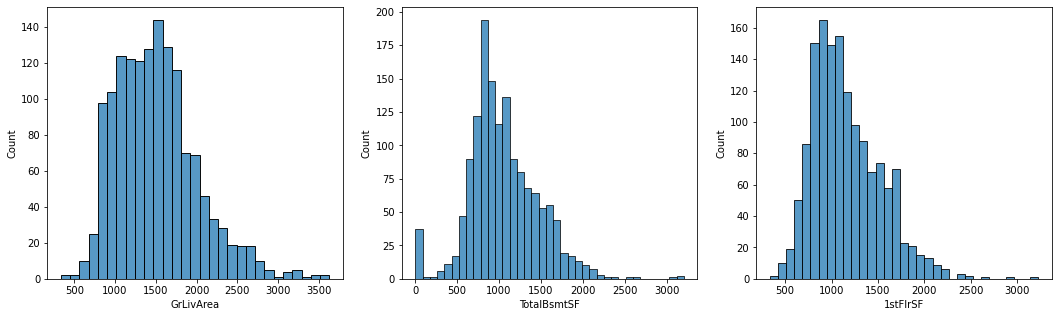

In [21]:
# See if the numerical variables have a normal distribution
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=train['GrLivArea'], ax=ax[0])
sns.histplot(data=train['TotalBsmtSF'], ax=ax[1])
sns.histplot(data=train['1stFlrSF'], ax=ax[2])

It seems that the distribution of the other variables are similar to the target variable. Consequently, we will apply a transformation method to all of them.

In [22]:
# Apply Log Transformation
train['SalePrice'] = np.log(train['SalePrice'])
train['GrLivArea'] = np.log(train['GrLivArea'])
train['1stFlrSF'] = np.log(train['1stFlrSF'])

# Apply Square Root Transformation
train['TotalBsmtSF'] = np.sqrt(train['TotalBsmtSF'])

I made some tests and concluded that the "TotalBsmtSF" variable would be more normally distributed if I apply a square root transformation instead of the common log transformation.

After this, let's see how our data changed.

Skew:  0.06544882031646646
Kurtosis:  0.6664384720246721


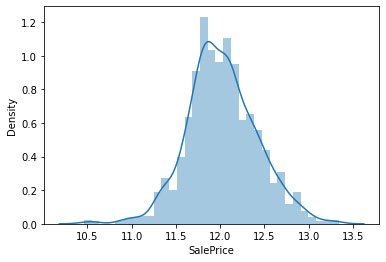

In [23]:
sns.distplot(train['SalePrice'])
print("Skew: ", train['SalePrice'].skew())
print("Kurtosis: ", train['SalePrice'].kurtosis())

The "SalePrice" skew before the transformation was 1.88, now it's 0.12; the kurtosis was 6.54, and now it's 0.81.

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

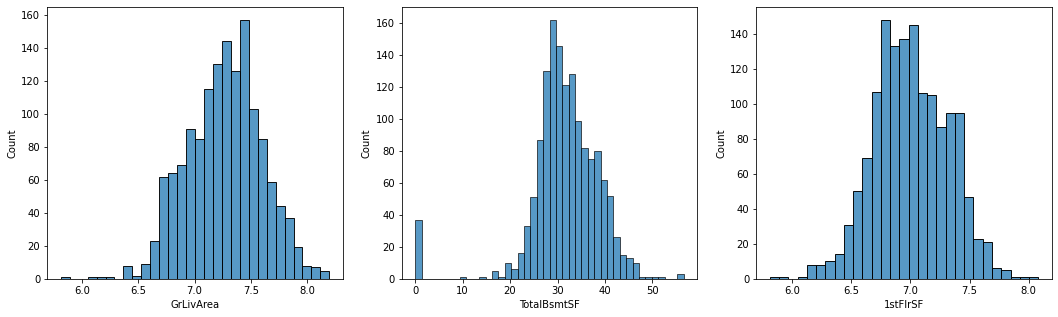

In [24]:
# See if the numerical variables have a normal distribution
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=train['GrLivArea'], ax=ax[0])
sns.histplot(data=train['TotalBsmtSF'], ax=ax[1])
sns.histplot(data=train['1stFlrSF'], ax=ax[2])

And the independent variables look much more like a normal distribution than before.

Now let's compare the linear relationship of the variables through a scatterplot before and after the transformation.

#### Before the transformation

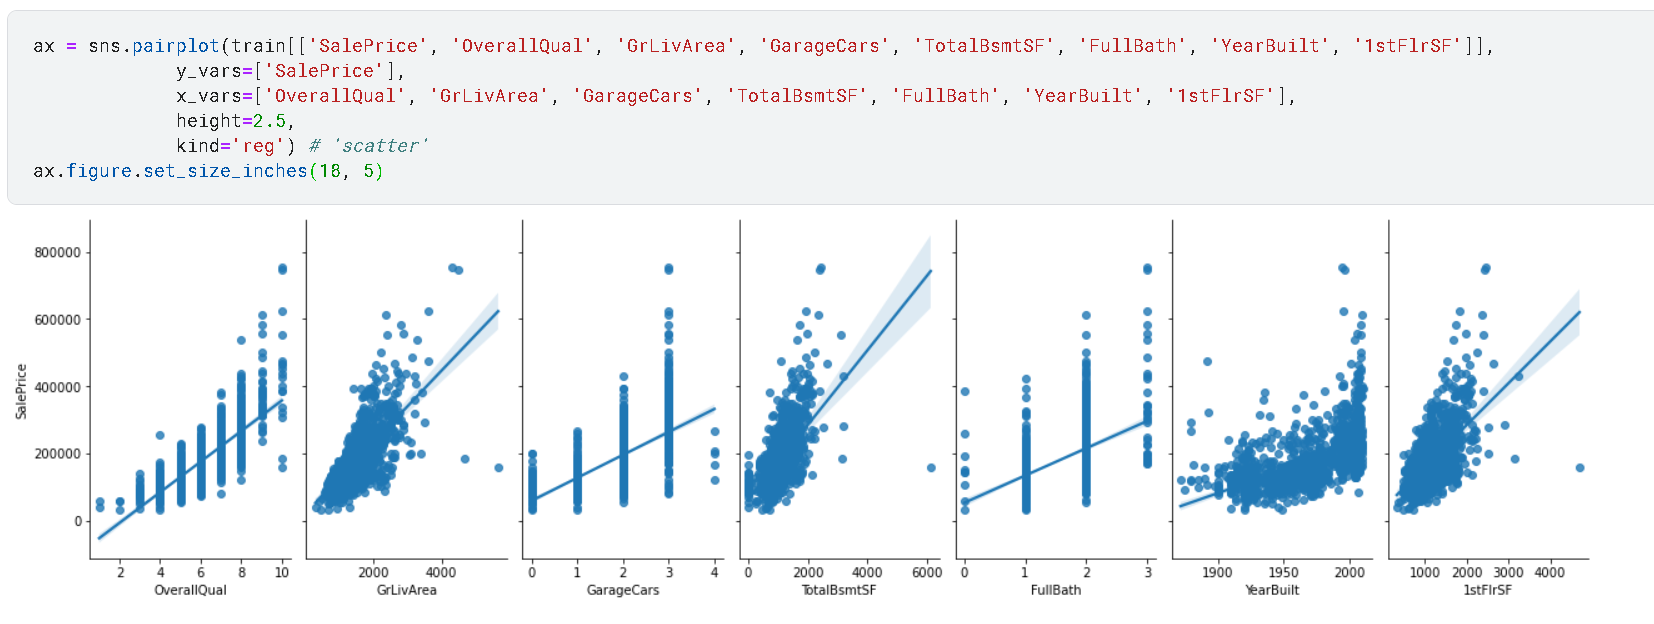

#### After the Transformation

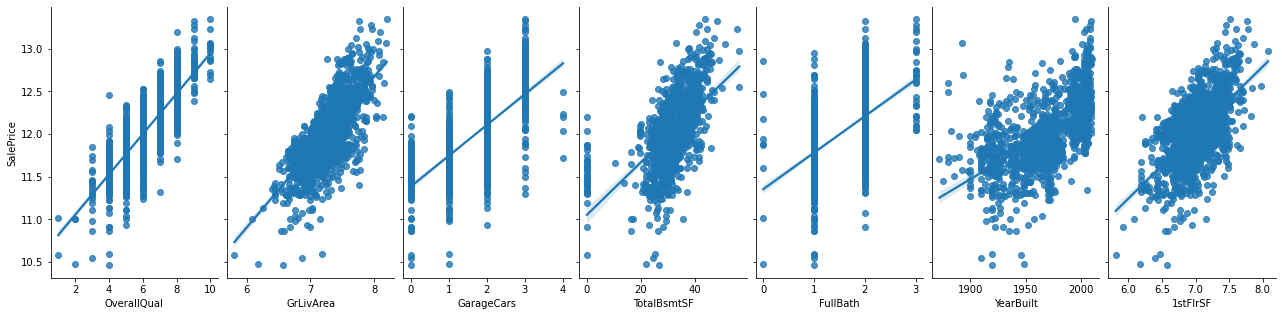

In [25]:
ax = sns.pairplot(train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF']], 
             y_vars=['SalePrice'],
             x_vars=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF'],
             height=2.5,
             kind='reg') # 'scatter'
ax.figure.set_size_inches(18, 5)

Looking at the variables that we did the transformation, we see that they have a more visible linear relationship. Why this? Because the transformation improved the linearity relationship of the variables.

<a id="conclusion"></a>
## Conclusion

In this article, we understood the difference between a Classification and Regressor model; met the linear regression equation; saw the general characteristics of the dataset and the target variable behavior.

Through this analysis, we concluded that not only the target variable but also some quantitative variables would need a transformation to become normalized variables and learned why to do this.

We also saw the reason why some values are missing, divided the variables between quantitative and qualitative variables, and learned two common approaches to deal with the qualitative variables: Ordinal Encoder and One Hot Encoder.

In the next part of this article, we will start dealing with the missing values; learn how to build and use a Pipeline to preprocess the data; comprehend how works a Linear Regression Model behind the scenes; learn how to statistically analyze the fitting of the model to the data; and will see the most popular regression models.

<a id="part_two"></a>
<h2><b> Part Two </b></h2>

---

#### Code from the article: [(Coming soon...)](Linear Regression: Advanced Modeling Techniques & Pipeline [Pt.2])

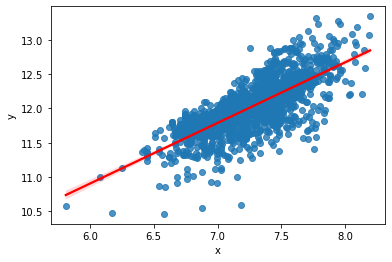

In [26]:
ax = sns.regplot(data=train, x='GrLivArea', y='SalePrice', line_kws={"color": "red"})
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In this article, we will give continuity to the article Linear Regression: Advanced Modeling Techniques & Pipeline [Pt.1]. So, if you wanna understand how we arrived at this point, please read it.

In Part 1 we finished with the transformation of the quantitative variables, now let's prepare the dataset dealing with the missing values and preprocessing the columns using a Pipeline, to them enter into the concept of Linear Regression and how it works behind the model.

<a id="missing_values"></a>
## Missing Values Treatment

Most of the variables that have null values, we aren't going to use. Recall that we already filtered the variables that we will use in the model in Part 1 of this series. The ones that have null values and we are going to use, are the variables that we classified as "ordinal_cols". Let's see which of the ordinal_cols columns have missing values.

In [28]:
# Prepare Train Dataset
missing_cols = (train.isnull().sum() / train.shape[0] * 100).sort_values(ascending=False)[:19].index
missing_ordinal_cols = [col for col in missing_cols if col in ordinal_cols]
missing_ordinal_cols

['FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1']

There are a total of 8 columns with missing values. The way I will deal with it is to fill the missing values with the string "Na".

If you remember - according to Part 1 analysis - it's not because a value is missing that it wasn't collected. All the columns that we are going to use and have missing values are columns where the null values represent something that doesn't exist. In this case, there are some houses without fireplace, garage, or basement. So I will simply fill these missing values with the string "Na", representing in the format of a string, that something doesn't exist.

In [29]:
# Fill Nan values with "Na"
train[missing_ordinal_cols] = train[missing_ordinal_cols].fillna(value='Na')

The "CentralAir" column is the only exception, as we saw in Part 1, it can only assume two values (Y, N); so I will replace it with a numerical value (1, 0); and save the name of the column in a list.

In [30]:
# Conver to 1 and 0
train.CentralAir = np.where(train.CentralAir=='Y', 1, 0)
central_air_col = ['CentralAir']

The test data came with missing values too, so I will fill some variables with the mean and mode. And for the variables that can have missing values because the null value represents that something doesn't exist in the house, I will fill with the string "Na" as I did with the train data. In the end, I will convert the (Y, N) of the "CentralAir" column with (1, 0).

In [31]:
# Prepare the test data

# Fill with central tendency measures
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mode()[0])

# Fill with "Na"
columns_fill_with_na = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']
test[columns_fill_with_na] = test[columns_fill_with_na].fillna('Na')

# Conver to 0 and 1
test.CentralAir = np.where(test.CentralAir=='Y', 1, 0)

Last but not least, I will save the name of all the relevant columns that we identified in a unique variable because it can be of use to us later.

In [32]:
# Columns selected
useful_cols = [col for col in train.columns if 
                    col in low_cardinality_cols or 
                    col in ordinal_cols or 
                    col in central_air_col or 
                    col in num_cols]

<a id="preprocessing"></a>
## Preprocessing with ColumnsTransformer

![Imgur](https://i.imgur.com/tDMLxup.png)

Pipelines are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

In [33]:
# Import libs

# Feature Engineer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

The first step to build a Pipeline is choosing the columns that we want to transform, and the way they will be preprocessed. Once the dataset contains columns that we don't wanna change, we will only transform the columns specified in the ColumnTransformer object.

This object is similar to how a pipeline bundles together preprocessing and modeling steps, however, the ColumnTransformer class only bundles together different preprocessing steps. 
 
We are going to apply:
 - Ordinal Encoding to the ordinal columns
 - One Hot Encoder to the low cardinality columns

In [34]:
# Select the Columns that we wanna transform and how we will transform them

# Column Transformer
# (name, transformer, columns)

preprocessor = ColumnTransformer(
                [('Ordinal_Encoder', OrdinalEncoder(), ordinal_cols),
                 ('One_Hot_Encoder', OneHotEncoder(handle_unknown='ignore', sparse=False), low_cardinality_cols)]
                 
)

When you are building a pipeline you don't need to always use the ColumnTransformer object, I used it because is a clean and easy way to use a pipeline that only transforms the specified columns of a dataset. There are more ways of building a Pipeline, and you can see the syntax of them only by doing a fast search on google.

<a id="pipeline_lr"></a>
## Pipeline with a Simple Linear Regression Model

The Linear Regression object of Sklearn is a very simple model, and I will just use it for pedagogical purposes, just to show how a pipeline is constructed.

In [35]:
# Model used in Pipeline
from sklearn.linear_model import LinearRegression

# Build the Pipeline
# steps = ('name', 'transform')
pipeline_simple_linear_regression = Pipeline(steps=[('preprocessor', preprocessor), ('lr', LinearRegression())])

# Split the target variable from the dataset
y = train['SalePrice']
X = train[useful_cols]

# Train
pipeline_simple_linear_regression.fit(X, y)

# Prediction
y_pred_lr = pipeline_simple_linear_regression.predict(test[useful_cols])

First, we import the library, and after this, we start building. In the pipeline, we will only put the steps: the preprocessor that we did earlier with the ColumnTransformer, which will do the transformation of the columns specified; after this, we put the Linear Regression model in the pipeline.

This way when we fit the pipeline to the data - behind the scenes - the data will be preprocessed, and with this data already preprocessed the pipeline will use to train the Linear Regression Model.
 
*The "name" isn't relevant, it's just a matter of organization, you can put any name to the transformer or the model.
 After this, we will split the train data into dependent variable Y, and independents variables X. This X data contains only the variables that we considered relevant to predicting the target variable Y, this is why we put train[useful_cols].
 
Then we fit the model with the raw data and leave the Pipeline to do all the rest. In the end, just make the prediction - now using the test data, with the same relevant columns selected in the train data. And even inserting the test data with the raw columns, you will see that will work because this data will be preprocessed by the Pipeline.
 
Isn't Pipeline amazing? The code is much cleaner than would be if we transform the columns one by one.
 Now, let's create a function that generates the submission file to Kaggle with the prediction variable.

In [36]:
# Function
def generate_submission(filename, y_predict):
    df = pd.DataFrame({'Id': range(1461,2920), 'SalePrice': y_predict})
    df.to_csv(filename, index=False)
    
    
# Create the file to submit to Kaggle
generate_submission('simple_lr_prediction.csv', y_pred_lr)

And submit it to Kaggle.

(Photo)

The result is almost 9.45, and what this means? Once we are predicting a quantity, as I said at the beginning of Part 1, this is a regressors model: the predictions are stored in the y_pred_lr, and when we send it to Kaggle, their algorithm compares with the real values using a measure called Root Mean Square Deviation, or just RMSD.

This measure, in brief words, represents the square root of the differences between predicted values and observed values.

<a id="linear_regression"></a>
## Linear Regression

A commonly used method for examining the relationship between two or more quantitative variables and for making predictions is linear regression.

In preparation for our discussion of linear regression, we will briefly review linear equations with one independent variable, and then start talking about the Regression Equation.

<a id="linear_equation"></a>
### Linear Equation

As an aid to understanding linear regression, we first need to review the linear equation with one independent variable. The form can be written as:

(Photo)

Where both b0 and b1 are constants (fixed numbers), x is the independent variable, and y is the dependent variable.

You may be familiar with the form y = ax + b instead of the form y = b0 + b1x. In statistics, the latter form is preferred because it allows a smoother transition to multiple regression, in which there is more than one independent variable. 

Returning to the linear equation, it's a straight line. Every nonvertical straight line can be represented by such an equation.

(Photo)

Both numbers b0 and b1 have an essential geometric interpretation. The number b0 is the y-value where the straight line of the equation intersects the y-axis, and is called intercept. The number b1 measures the slope of the straight line of the equation, more precisely, b1 indicates how much the y-value on the straight line changes when the x-value increases by 1 unit, and is called the slope.


#### Example:

Imagine that you wanna park your car and a sign shows that the cost of parking is 10 dollars for an hour and if your car stays longer you will be charged 5 dollars for every additional hour you stayed. In other words, if your car stayed 3 hours in the parking, you will have to pay 20 dollars (10 for the first hour plus 10 for the two additional hours). How can we find the equation that expresses the cost of parking in this place in terms of numbers?

#### Answer:

Let x denote the number of additional hours that your car stayed in the parking, and let y denote the total cost of the customer. Because the rate for additional hours is 5/hr, a car that parked for x additional hours will cost 5x plus the 10 first-hour charge. Hence the equation for the total cost is Y = 10 + 5x.

And with this linear equation, we can quickly estimate the cost, for example: how much would cost if my car stay 5 additional hours?

Y = 10 + 5(5)
Y = 35 dollars

We can obtain the graph of this equation by plotting points and connecting them with a straight line.

(Photo)

<a id="regression_equation"></a>
### Regression Equation

Real-life applications are frequently not so simple as the car parking example, in which one variable (cost) can be predicted exactly in terms of another variable (hour). For instance, we cannot predict the exact price, y, of a house just by knowing its age, x. Indeed, even for a fixed age, say, 10 years old, price varies from house to house. We would need more information such as the location, area, etc, to make an accurate prediction.

 Nevertheless, let's be content with making a rough prediction in this next example:
 
 Imagine that the data below displays the data on age and price for a sample of cars from a specific place in Brazil.

In [37]:
# Data
age = np.array([5, 4, 6, 5, 5, 5 ,6, 6 ,2, 7, 7])
price = np.array([85, 103, 70, 82, 89, 98, 66, 95, 169, 70, 48])
data = np.stack((age, price), axis=1)

sample = pd.DataFrame(data=data, columns=['Age (x)', 'Price (y)'])
sample

,Age (x),Price (y)
0,5,85
1,4,103
2,6,70
3,5,82
4,5,89
5,5,98
6,6,66
7,6,95
8,2,169
9,7,70


Plotting the data help us visualize any apparent relationship between age and price. Such a plot is called a scatter diagram (or scatterplot).

<AxesSubplot:xlabel='Age (x)', ylabel='Price (y)'>

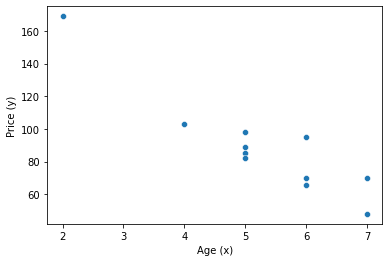

In [38]:
sns.scatterplot(data=sample, x='Age (x)', y='Price (y)')

Clearly, the data points do not lie on a straight line, but they appear to cluster about a straight line. We want to fit a straight line to the data points and use that line to predict the price of a house based on its age.

Because we could draw many different straight lines through the cluster of data points, we need a method to choose the "best" line. The method, called the ordinary least squares, is based on an analysis of the errors made in using a straight line to fit the data points. To introduce this concept, I will give an example.

<a id="ols"></a>
### Ordinary Least Squares (OLS)

Consider the problem of fitting a straight line to the four data points displayed below:

In [39]:
x = np.array([1, 1, 3, 4])
y = np.array([1, 2, 2, 6])
data2 = np.stack((x, y), axis=1)

sample2 = pd.DataFrame(data=data2, columns=['X', 'Y'])
sample2

,X,Y
0,1,1
1,1,2
2,3,2
3,4,6


(Photo)

Many (in fact, infinitely many) straight lines can be fit to the data points. Two possibilities are shown below:

1° Y = 0.50 + 1.25x

(Photo)

2° Y = -0.25 + 1.5x

(Photo)

To measure quantitatively how well a line fits the data, we first consider the error, e, made in using the line to predict the y-values of the data points. For instance, in Fig.1 the y-values predicted by the line was 3, and the observed value is 2, so e = observed y - predicted y = 2–3 = -1.

Now, we discover the error of all the other errors of each line and then compute the sum of the squared errors.

(Photo)

Now you may be asking why square the errors when you can just use the sum of the absolute errors, which would give the real value of the sum of the errors. The reason behind square the error is "punish more" predicted values that are far from the observed values, giving more weight to the error depending on how far the predicted value is from the observed value.

Calculating the sum of square errors of the line in Fig.1, we find 1.875; whereas, in Fig.2, we find 1.25 of the sum of square errors. With the results in mind, we can state - based on least-squares criterion - that the Line of Fig.2 fits best the data points.

Although the ordinary least squares state the property that the regression line for a set of data points must satisfy, it does not tell us how to find that line.

To deal with this task, you have to calculate using some formulas, however, explaining the concept would demand an article. If you are curious about it, I strongly recommend reading the book Introductory Statistics by Neil A. Weiss, which is a book that explains the concept, teach how to calculate the Regression Equation, and also show the basic of statistics.

<a id="lr_ml"></a>
## Linear Regression and Machine Learning

(Photo)

Now that you already know the concept, we will see how this equation works in practice. But, before going directly to the point, I will treat all the data again to the new model that we are going to build without using the Pipeline, so you can see how we gained time using Pipeline and ColumnTransfomer.

In [40]:
# Prepare the dataset

# Save the index of the datasets to recuperate posteriously
train_idx = train.shape[0]
test_idx = test.shape[0]

# Save id for submission in Kaggle
sale_price_id = test['Id']

# Extract the column Survived from train dataset and delete it
target = np.ravel(np.array(train['SalePrice']).reshape(-1, 1))
train_copy = train.drop(axis=1, columns='SalePrice')

# Concatenate train and test into a single dataframe
df_merged = pd.concat(objs=[train_copy, test]).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged = df_merged[useful_cols]

# Central Air Column
df_merged['CentralAir'] = np.where(df_merged['CentralAir']=='Y', 1, 0)

# One Hot Encoder

# Transform the low cardinality columns into dummies
street_dummies = pd.get_dummies(df_merged['Street'], prefix='Street')
lotconfig_dummies = pd.get_dummies(df_merged['LotConfig'], prefix='LotConfig')
roofstyle_dummies = pd.get_dummies(df_merged['RoofStyle'], prefix='RoofStyle')
foundation_dummies = pd.get_dummies(df_merged['Foundation'], prefix='Foundation')
heating_dummies = pd.get_dummies(df_merged['Heating'], prefix='Heating')

df_merged = pd.concat([df_merged, street_dummies, lotconfig_dummies, roofstyle_dummies, foundation_dummies, heating_dummies], axis=1)

# Drop the old Embarked column
df_merged.drop(axis=1, columns=['Street', 'LotConfig', 'RoofStyle', 'Foundation', 'Heating'], inplace=True)

# Ordinal Encoder

ordinal_encoder = OrdinalEncoder()
df_merged[ordinal_cols] = ordinal_encoder.fit_transform(df_merged[ordinal_cols])

display(df_merged.head())

# Separating df_merged to train and test
X_sm = df_merged.iloc[:train_idx]
test_sm = df_merged.iloc[train_idx:]

df_merged.shape: (2915 x 80)


,LotShape,LandContour,Utilities,LandSlope,OverallQual,YearBuilt,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,3.0,3.0,0.0,0.0,7,2003,2.0,4.0,2.0,4.0,...,1,0,0,0,0,1,0,0,0,0
1,3.0,3.0,0.0,0.0,6,1976,3.0,4.0,2.0,4.0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,3.0,0.0,0.0,7,2001,2.0,4.0,2.0,4.0,...,1,0,0,0,0,1,0,0,0,0
3,0.0,3.0,0.0,0.0,7,1915,3.0,4.0,4.0,1.0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,3.0,0.0,0.0,8,2000,2.0,4.0,2.0,4.0,...,1,0,0,0,0,1,0,0,0,0


The only thing that you need to know in this code is that I split the target variable from the train dataset and put the name "target" instead of "Y", then I merged the train and test dataset, and when I finished treating the data, I separated train and test dataset. For the train dataset, I put the name "X_sm" instead of only "X" that I used in the last model, and put "test_sm" to the test dataset.

Now, we are ready to start the interesting part of the article. First of all, let's import the library Statsmodel, which contains the module to implement the **Ordinary Least Squares (OLS)** method of linear regression.

In [41]:
# Libs
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
# Applying Ordinary Least Square method
model_sm = sm.OLS(target, X_sm).fit()

Behind the scenes, when we use the method .fit() in the OLS model, the data will be fitted in the equation, in other words, the model will calculate the b0, b1, b2… such that, the total sum of squares of the difference between the calculated and observed values of y, is minimized.

<a id="analysis"></a>
## Analysis of the fitting of the model to the data

In [43]:
# Regression Results
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     223.2
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:33:19   Log-Likelihood:                 793.14
No. Observations:                1456   AIC:                            -1496.
Df Residuals:                    1411   BIC:                            -1259.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
LotShape             -0.0098      0.003     -3.276      0.001      -0.016      -0.004
LandContour          -0.0022      0.006     -0.362      0.717      -0.014       0.010
Utilities            -0.2441      0.144     -1.695      0.090      -0.527       0.038
LandSlope             0.0462      0.016      2.885      0.004       0.015       0.078
OverallQual           0.0830      0.005     16.481      0.000       0.073       0.093
YearBuilt             0.0010      0.000      3.513      0.000       0.000       0.002
ExterQual            -0.0045      0.009     -0.529      0.597      -0.021       0.012
ExterCond            -0.0005      0.006     -0.099      0.921      -0.011       0.010
BsmtQual             -0.0110      0.005     -2.421      0.016      -0.020      -0.002
BsmtCond              0.0064      0.004      1.478      0.140      -0.002       0.015
BsmtExposure         -0.0094      0.003     -3.481      0.001      -0.015      -0.004
BsmtFinType1         -0.0161      0.002     -8.730      0.000      -0.020      -0.012
TotalBsmtSF           0.0054      0.001      5.476      0.000       0.003       0.007
HeatingQC            -0.0152      0.003     -5.670      0.000      -0.020      -0.010
CentralAir        -2.271e-14   2.33e-15     -9.725      0.000   -2.73e-14   -1.81e-14
1stFlrSF              0.0772      0.021      3.689      0.000       0.036       0.118
GrLivArea             0.4146      0.020     21.001      0.000       0.376       0.453
FullBath             -0.0040      0.011     -0.385      0.700      -0.025       0.017
KitchenQual          -0.0321      0.006     -5.025      0.000      -0.045      -0.020
FireplaceQu          -0.0061      0.003     -1.780      0.075      -0.013       0.001
GarageFinish         -0.0086      0.004     -2.235      0.026      -0.016      -0.001
GarageCars            0.0589      0.007      7.865      0.000       0.044       0.074
GarageQual           -0.0017      0.006     -0.300      0.764      -0.013       0.010
GarageCond            0.0179      0.006      2.773      0.006       0.005       0.031
PavedDrive            0.0297      0.009      3.252      0.001       0.012       0.048
Street_Grvl           2.3251      0.249      9.348      0.000       1.837       2.813
Street_Pave           2.4805      0.246     10.090      0.000       1.998       2.963
LotConfig_Corner      0.9712      0.099      9.773      0.000       0.776       1.166
LotConfig_CulDSac     1.0194      0.101     10.077      0.000       0.821       1.218
LotConfig_FR2         0.9424      0.101      9.358      0.000       0.745       1.140
LotConfig_FR3         0.9087      0.113      8.036      0.000       0.687       1.130
LotConfig_Inside      0.9638      0.100      9.661      0.000       0.768       1.160
RoofStyle_Flat        0.7744      0.090      8.572      0.000       0.597

Through the method .summary() of the model, we can see the summarization of the regression results. The model shows many descriptive measures and statistical tests to you see how your model fitted the data, but in this article, I will not explain what each descriptive measure means because this is not the intention of this article. I will just explain the most important ones for now.

<a id="r_squared"></a>
### R-squared

The book that I indicated earlier explains the concept and how to calculate it, but for now, you just need to know that is called the coefficient of determination, and shows the percentage of variation in the observed values explained by the regression, or just how useful a variable is to predict another.

(Photo)

The closer to 1, the better the variables are to explain the target variable "SalePrice".

<a id="coef"></a>
### Coef
It is the b1, b2… of each variable.

(photo)

For instance, for the "GrLivArea" variable the slope of the line is 0.4146. The coefficient term tells the change in Y for a unit change in X, if "GrLivArea" rises by 1 unit then "SalePrice" rises by 0.4146. If you are familiar with derivatives then you can relate it to the rate of change of Y with respect to X.

<a id="p_test"></a>
### P>|t|

Tests the significance of each parameter individually.

(Photo)

P > |t| under 0.05 is generally considered significant, under 0.01 is very significant, and when is over 0.05 the variable is considered not significant for the model.

Before doing anything, let's generate a submission with this model:

In [44]:
# Prediction
y_pred_sm = model_sm.predict(test_sm)

generate_submission('stats_models_prediction.csv', y_pred_sm)

By submitting it to Kaggle we achieve a score of 0.52, a huge improvement if compared to the score of 9.45 of the Simple Linear Regression Model.

(Photo)

Now, let's see a way of improving, even more, the model. A good way to do this would be excluding the irrelevant variables according to the P>|t| test.

We will consider that a variable is irrelevant if its P>|t| test is above 0.05, and we will assign the relevant variables in the variable significant_p_values.

In [45]:
# Organize the P>|t| values into a DataFrame Structure
p_values = pd.DataFrame(model_sm.pvalues, columns=['P>|t|'])

# Select the variables with P>|t| values above 0.05
significant_p_values = p_values[p_values <= 0.05]
significant_p_values.dropna(axis=0, inplace=True)
significant_p_values

,P>|t|
LotShape,1.077974e-03
LandSlope,3.973740e-03
OverallQual,5.977725e-56
YearBuilt,4.573034e-04
BsmtQual,1.561764e-02
BsmtExposure,5.153870e-04
BsmtFinType1,7.058103e-18
TotalBsmtSF,5.151114e-08
HeatingQC,1.734281e-08
CentralAir,1.108482e-21


After doing this, let's create another model with the name model_sm2, and train it only with the variables considered relevant, so we will use the names of the index of the variable significant_p_values.

In [46]:
# Train the model now improved
model_sm2 = sm.OLS(target, X_sm[significant_p_values.index]).fit()
model_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     272.4
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:33:19   Log-Likelihood:                 788.56
No. Observations:                1456   AIC:                            -1503.
Df Residuals:                    1419   BIC:                            -1308.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
LotShape             -0.0095      0.003     -3.226      0.001      -0.015      -0.004
LandSlope             0.0481      0.015      3.221      0.001       0.019       0.077
OverallQual           0.0844      0.005     17.116      0.000       0.075       0.094
YearBuilt             0.0009      0.000      3.495      0.000       0.000       0.001
BsmtQual             -0.0113      0.004     -2.527      0.012      -0.020      -0.003
BsmtExposure         -0.0099      0.003     -3.663      0.000      -0.015      -0.005
BsmtFinType1         -0.0159      0.002     -8.717      0.000      -0.020      -0.012
TotalBsmtSF           0.0058      0.001      6.035      0.000       0.004       0.008
HeatingQC            -0.0157      0.003     -5.928      0.000      -0.021      -0.010
CentralAir        -6.963e-16   7.96e-16     -0.874      0.382   -2.26e-15    8.66e-16
1stFlrSF              0.0732      0.021      3.517      0.000       0.032       0.114
GrLivArea             0.4068      0.017     23.784      0.000       0.373       0.440
KitchenQual          -0.0348      0.006     -5.948      0.000      -0.046      -0.023
GarageFinish         -0.0084      0.004     -2.175      0.030      -0.016      -0.001
GarageCars            0.0578      0.007      7.818      0.000       0.043       0.072
GarageCond            0.0177      0.006      3.206      0.001       0.007       0.029
PavedDrive            0.0301      0.009      3.323      0.001       0.012       0.048
Street_Grvl           2.4041      0.230     10.432      0.000       1.952       2.856
Street_Pave           2.5524      0.227     11.237      0.000       2.107       2.998
LotConfig_Corner      1.0036      0.092     10.962      0.000       0.824       1.183
LotConfig_CulDSac     1.0488      0.093     11.234      0.000       0.866       1.232
LotConfig_FR2         0.9731      0.094     10.402      0.000       0.790       1.157
LotConfig_FR3         0.9344      0.108      8.683      0.000       0.723       1.145
LotConfig_Inside      0.9967      0.092     10.815      0.000       0.816       1.177
RoofStyle_Flat        0.7943      0.085      9.336      0.000       0.627       0.961
RoofStyle_Gable       0.8017      0.078     10.301      0.000       0.649       0.954
RoofStyle_Gambrel     0.8297      0.085      9.780      0.000       0.663       0.996
RoofStyle_Hip         0.8203      0.078     10.560      0.000       0.668       0.973
RoofStyle_Mansard     0.8635      0.091      9.489      0.000       0.685       1.042
RoofStyle_Shed        0.8470      0.118      7.184      0.000       0.616       1.078
Foundation_BrkTil     0.8255      0.071     11.640      0.000       0.686       0.965
Foundation_CBlock     0.8539      0.078     10.975      0.000       0.701       1.007
Foundation_PConc      0.8499      0.081     10.535      0.000       0.692

Make the prediction with this new improved model and send the submission.

In [47]:
# Prediction
y_pred_sm2 = model_sm2.predict(test_sm[significant_p_values.index])

# Submission
generate_submission('stats_models_prediction2.csv', y_pred_sm2)

(Photo)

The result was slightly better than the model without improvement. This way you can see that not all the variables used to train a model are significant, and in your company, you can reduce the costs of a data science project only by cutting out the insignificant variables. Sometimes the variable can be even relevant, but the cost to obtain this data can be too high, being your job to decide if the data is worth being collected.

Now let's do the same thing but with a Random Forest Regressor model of the Sklearn library, first we train the model with all the variables previously selected and then we train another model only with the variables with a P>|t| test lower than 0.05. And in the end, we compare the results.

<a id="rfr"></a>
## Random Forest Regressor

### Variables previously selected

In [48]:
# Model used in Pipeline
from sklearn.ensemble import RandomForestRegressor

# Build the Pipeline
# steps = ('name', 'transform')
pipeline_random_forest_regressor = Pipeline(steps=[('preprocessor', preprocessor), ('rfr', RandomForestRegressor())])

# Split the target variable from the dataset
y = train['SalePrice']
X = train[useful_cols]

# Train
pipeline_random_forest_regressor.fit(X, y)

# Predict
y_pred_simple_rfr = pipeline_random_forest_regressor.predict(test[useful_cols])

(Photo)

### Only with the variables with a P>|t| test lower than 0.05

In [49]:
# Model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_sm[significant_p_values.index], target)

y_pred_complex_rfr = rf_regressor.predict(test_sm[significant_p_values.index])

(Photo)

This time we obtained an even better accuracy, the Random Forest Regressor with all the variables previously selected obtained a score of 0.23, while the improved version obtained 0.16.

Lastly, let's do the same thing with the Extreme Gradient Boosting Regressor, training with all the variables previously selected, and then training with the variables with a P>|t| test lower than 0.05.

In [50]:
# Generate the submission for the two Random Regressor Models
generate_submission('simple_rfr_prediction.csv', y_pred_simple_rfr)
generate_submission('complex_rfr_prediction.csv', y_pred_complex_rfr)

<a id="xgbr"></a>
## Extreme Gradient Boosting Regressor

### Variables previously selected

In [51]:
# Model used in Pipeline
from xgboost import XGBRegressor

# Build the Pipeline
# steps = ('name', 'transform')
pipeline_xgbregressor = Pipeline(steps=[('preprocessor', preprocessor), ('xgbr', XGBRegressor())])

# Split the target variable from the dataset
y = train['SalePrice']

useful_cols = [col for col in train.columns if 
                    col in low_cardinality_cols or 
                    col in ordinal_cols or 
                    col in central_air_col or 
                    col in num_cols]
X = train[useful_cols]

# Train
pipeline_xgbregressor.fit(X, y)

# Predict
y_pred_simple_xgbr = pipeline_xgbregressor.predict(test[useful_cols])

### Only with the variables with a P>|t| test lower than 0.05

In [52]:
# Model
xgbregressor = XGBRegressor()
xgbregressor.fit(X_sm[significant_p_values.index], target)

y_pred_complex_xgrb = xgbregressor.predict(test_sm[significant_p_values.index])

Initially, I thought that the XGB Regressor would have a better score than the Random Forest Regressor, and I think that we can improve even more the XGB Regressor by modifying the Hyper Params of the model, but this is the topic for a next article.

In [53]:
# Generate the submission for the two Extreme Gradient Boost Regressor Models 
generate_submission('simple_xgbr_prediction.csv', y_pred_simple_xgbr)
generate_submission('complex_xgbr_prediction.csv', y_pred_complex_xgrb)

<a id="conclusion_2"></a>
## Conclusion

In this article, we started treating the missing values; preprocessed the data through a Pipeline; understood the Linear Regression Equation; learned the Ordinary Least Square Method concept; comprehended how it works in a Machine Learning Model; learned how to statistically analyze the fitting of a model to the data; and saw the most popular regressors models.

This is the end of a series composed of two articles, if you hadn't seen the Part 1, I suggest reading it to see the full project based on a Kaggle Competition to Predict House Sales Prices.

If appear any doubt, please feel free to post a comment, I will try to answer as quickly as possible.